In [451]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
import cv2
from PIL import Image

In [452]:
def resize_img(imagem, redimen):
    resize_imagem = cv2.resize(imagem, dsize=(redimen, redimen), interpolation=cv2.INTER_LINEAR)
    return np.array(resize_imagem)

In [453]:
# imagem = Image.open(f'photos\\IMG(5219).PNG')
# imagem_numpy = np.array(imagem)
# imagem_numpy = resize_img(imagem_numpy, 240)

def show(imagem_numpy):
    plt.axis('off')
    plt.imshow(imagem_numpy, cmap="gray")
    plt.show()


In [454]:
def get_imagens(endereco, files, shape, cor = True, corte = (0,0), redimen = 0):

    num_photos = len(files)

    width,height = shape
    
    if redimen != 0:
        width,height = redimen, redimen
        x1, y1 = corte
        x2 = x1 + shape[0]
        y2 = y1 + shape[1]
    else:
        x1, y1 = corte
        x2 = x1 + width
        y2 = y1 + height
        

    if cor:
        imagens = np.zeros((num_photos,width,height,3))
    else:
        imagens = np.zeros((num_photos,width,height))

    imagens = imagens.astype(np.uint8)

    for i, file in enumerate(files):
        
        imagem = Image.open(f'{endereco}\\{file}')
        if not cor: imagem = imagem.convert('L')
        imagem_numpy = np.array(imagem)
        imagem_numpy

        imagem_numpy = imagem_numpy[x1:x2,y1:y2]                # Corte da imagem original
        
        if redimen != 0: imagem_numpy = resize_img(imagem_numpy, redimen)   # Redimensionar as imagens
        

        imagens[i] = imagem_numpy                               # Adição da imagem i ao array

    return imagens

In [455]:
def proporcao(tamanho):
    x = tamanho**(1/2)
    x = round(x)
    while(tamanho % x != 0):
        x -= 1
    y = int(tamanho/x)
    return x, y

In [456]:
def show_photos(imagens, cmap ='gray'):

    tamanho = imagens.shape[0]

    dim_x, dim_y = proporcao(tamanho)

    # Configurar a plotagem para mostrar imagens
    fig, axs = plt.subplots(dim_y, dim_x)

    # Iterar sobre as imagens e exibi-las em sequência
    for i in range(dim_y):
        for j in range(dim_x):
            axs[i,j].imshow(imagens[i*dim_x+j], cmap = cmap)
            axs[i,j].axis('off')  # Desativar eixos para uma melhor visualização

    # Exibir a sequência de imagens
    plt.show()


In [457]:
def create_photo(imagens, lin, col, cor = True):

    
    altura = imagens.shape[1]
    largura = imagens.shape[2]

    nova_altura = lin * altura
    nova_largura = col * largura

    if cor:
        imagem = np.zeros((nova_altura, nova_largura, 3))
        imagem = imagem.astype(np.uint8)
    else:
        imagem = np.zeros((nova_altura, nova_largura))


    for i in range(lin):
        for j in range(col):
            
            index = i*col+j

            foto_selecionada = imagens[index]
        
            if cor:
                imagem[i * altura : (i + 1) * altura, j * largura : (j + 1) * largura, :] = foto_selecionada 
            else:
                imagem[i * altura : (i + 1) * altura, j * largura : (j + 1) * largura] = foto_selecionada 
            
    return imagem

In [458]:
def images_vector(imagens):
    num_imagens, altura, largura = imagens.shape

    tam_col = largura * altura

    vectors = np.zeros((tam_col, num_imagens))

    for i in range(num_imagens):
        vectors[:,i] = imagens[i].reshape(tam_col)

    return vectors, altura, largura

In [459]:
def reconstruct_image(avarege_face, altura, largura, show = True):
    avarege_image = avarege_face.reshape(altura,largura)

    if show:
        print("*"*60)
        plt.axis('off')
        plt.imshow(avarege_image, cmap="gray")
        plt.show()

    return avarege_image

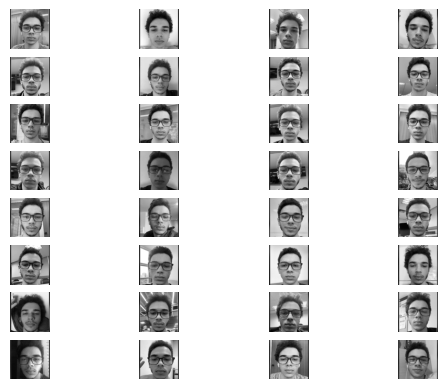

In [460]:
endereco = "photos"
lista_de_fotos = os.listdir(endereco)

imagens_0 = get_imagens(endereco, lista_de_fotos, (775, 775), cor = False, corte = (340,25), redimen=240)

show_photos(imagens_0)

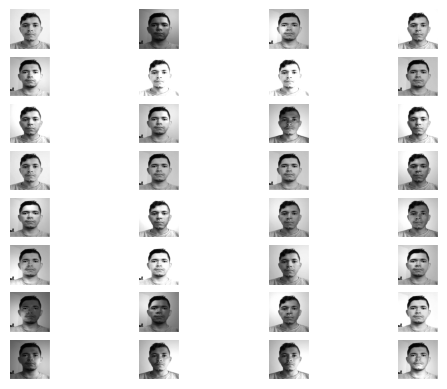

In [461]:
endereco = "fotos"
lista_de_fotos = os.listdir(endereco)

imagens_1 = get_imagens(endereco, lista_de_fotos, (775, 775), cor = False, redimen=240)

show_photos(imagens_1)

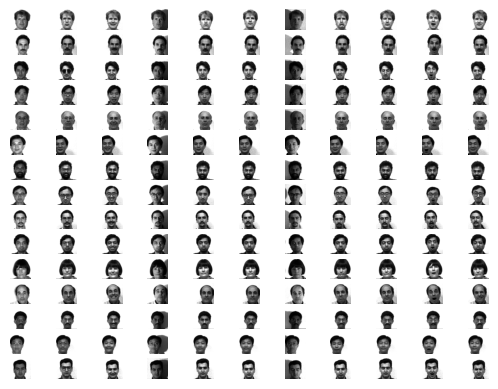

In [462]:
endereco = ".\\archive"
lista_de_fotos = os.listdir(endereco)

imagens = get_imagens(endereco, lista_de_fotos[2:], (240,240), cor = False, corte = (2,52))

show_photos(imagens)

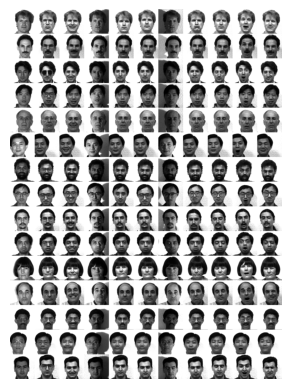

In [463]:
foto = create_photo(imagens, 15, 11, cor = False)
plt.axis('off')
plt.imshow(foto, cmap="gray")
plt.show()

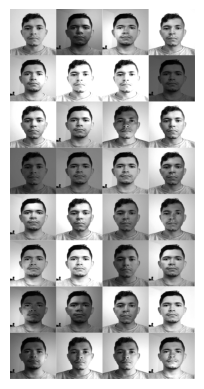

In [464]:
foto = create_photo(imagens_1, 8, 4, cor = False)
img = plt.imshow(foto, cmap="gray")
plt.axis('off')
plt.show()

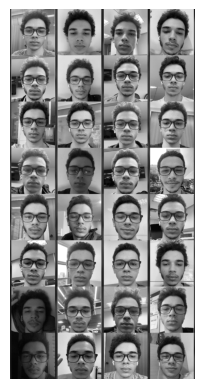

In [465]:

foto = create_photo(imagens_0, 8, 4, cor = False)
img = plt.imshow(foto, cmap="gray")
plt.axis('off')
plt.show()

************************************************************


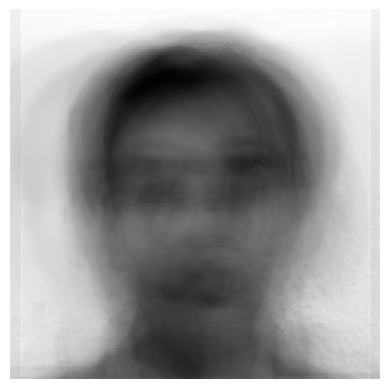

************************************************************


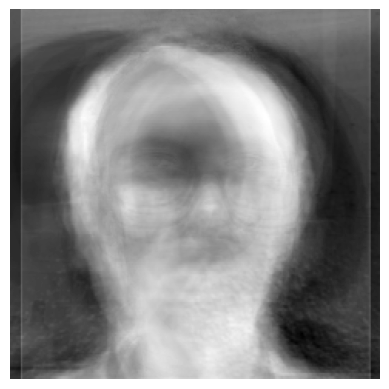

************************************************************


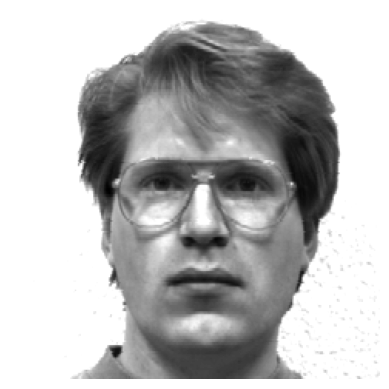

************************************************************


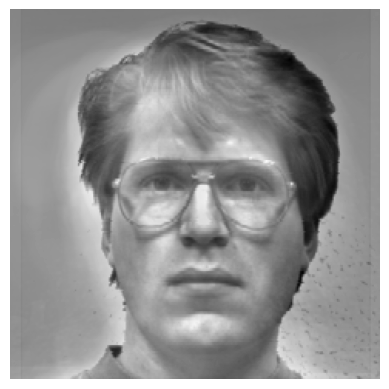

(57600,)
************************************************************


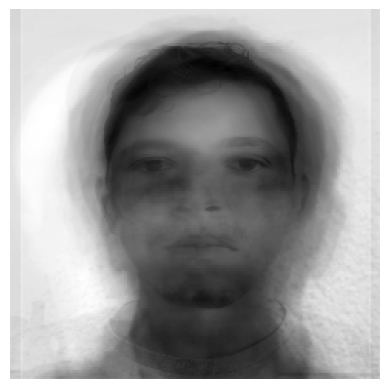

(57600,)
************************************************************


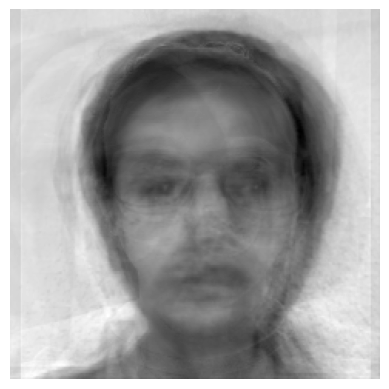

(57600,)
************************************************************


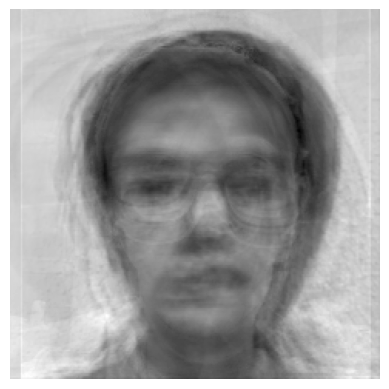

(57600,)
************************************************************


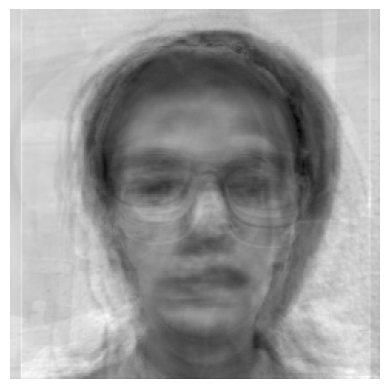

(57600,)
************************************************************


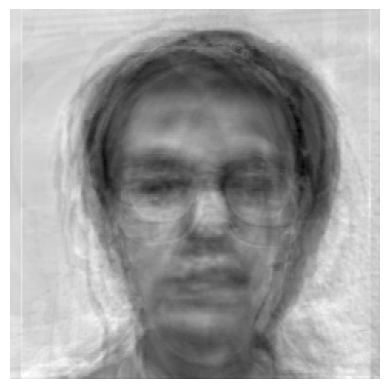

(57600,)
************************************************************


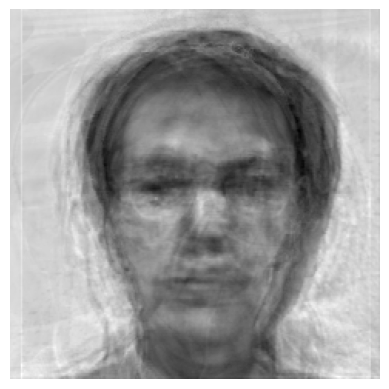

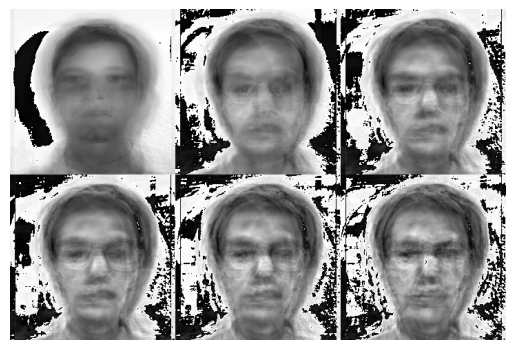

In [469]:
def treino(imagens, num_treino):
    imagens_vetor, altura, largura = images_vector(imagens)
    imagens_treino = imagens_vetor[:,num_treino:]

    avarege_face = np.mean(imagens_treino, axis=1)
    reconstruct_image(avarege_face, altura, largura)

    X = (imagens_treino.transpose() - avarege_face).transpose()
    U, _, _ = np.linalg.svd(X, full_matrices=False)     # U, S, V 

    return U, altura, largura, imagens_vetor[:,:10], avarege_face


nova_imagens = np.concatenate((imagens, imagens_0[:11,:,:]), axis=0)        # Juntando imagens de "George" a base de dados
nova_imagens = np.concatenate((nova_imagens, imagens_1[:11,:,:]), axis=0)   # Juntando imagens de "Mikael" a base de dados

U, altura, largura, teste, face_media = treino(nova_imagens, 22)#treino(imagens_0, 5)

pessoa = teste[:, 1]

reconstruct_image(U[:, 1], altura, largura, )                   # Mostra face de U
pessoa_0 = reconstruct_image(pessoa, altura, largura)    # Mostra face de 0
pessoa_0_negativa = pessoa - face_media
reconstruct_image(pessoa_0_negativa, altura, largura)

tamanho_reconstrucao = [5, 25, 55, 65, 95, 150]

r_num = len(tamanho_reconstrucao)

reconstrucao = np.zeros((r_num,altura,largura))
reconstrucao = reconstrucao.astype(np.uint8)

for i, r in enumerate(tamanho_reconstrucao):
    reconFace = face_media + U[:,:r] @ (U[:,:r].T @ pessoa_0_negativa)
    print(reconFace.shape)
    reconstrucao[i,:,:] = reconstruct_image(reconFace, altura, largura, show=True)

#reconstrucao[r_num,:,:] = pessoa_0

foto = create_photo(reconstrucao, 2, 3, cor = False)
plt.axis('off')
plt.imshow(foto, cmap="gray")
plt.show()